# Homework 3: Machine Learning Tasks (XX/125 points)
## Due Monday 12/7/2022 11:59 pm
## About Dataset
### Data from a semi-conductor manufacturing process

Number of Instances: 1567 <br>
Area: Computer<br>
Attribute Characteristics: Real<br>
Number of Attributes: 591<br>
Date Donated: 2008-11-19<br>
Associated Tasks: Classification, Causal-Discovery<br>
Missing Values? Yes<br>

A complex modern semi-conductor manufacturing process is normally under consistent
surveillance via the monitoring of signals/variables collected from sensors and or
process measurement points. However, not all of these signals are equally valuable
in a specific monitoring system. The measured signals contain a combination of
useful information, irrelevant information as well as noise. It is often the case
that useful information is buried in the latter two. Engineers typically have a
much larger number of signals than are actually required. If we consider each type
of signal as a feature, then feature selection may be applied to identify the most
relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will
enable an increase in process throughput, decreased time to learning and reduce the per unit production costs.

To enhance current business improvement techniques the application of feature
selection as an intelligent systems technique is being investigated.

The dataset presented in this case represents a selection of such features where
each example represents a single production entity with associated measured
features and the labels represent a simple pass/fail yield for in-house line testing, figure 2, and associated date time stamp. Where -1 corresponds to a pass
and 1 corresponds to a fail and the data time stamp is for that specific test
point.

This homework assignment will walk you through how to tackle this real problem. 

It is worth noting that this is an actual dataset and thus the problem is not fully tractable. Like many real problems, sometimes you do not have the necessary information to make a perfect solution. We want a useful and informative solution. 

In [ ]:
## Here are some packages and modules that you will use. Make sure they are installed.

# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for modeling 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import plotly_express as px

from imblearn.over_sampling import SMOTE

# to avoid warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Loading the data (5 points)

1. The data file is in a file called `uci-secom.csv` scikit-learn works well with pandas. It is recommended that you read the csv into a pandas array.
2. It is useful to print the shape of the output array to know what the data is that you are working with


In [ ]:
df = pd.read_csv("uci-secom.csv")

3. Pandas has a built-in method called head that shows the first few rows, this is useful to see what the data looks like 

In [ ]:
df.head()

## Filtering Data (5 points)

Real data is usually a mess. There could be missing points, outliers, and features that could have vastly different values and ranges. 
* Machine learning models are influenced heavily by these problems 


### Fixing Missing Values (5 Points)

1. It is not uncommon that some of the features have only a few entries. These are not helpful for machine learning. We should just remove these features from the data

It is good to visualize how many missing values each feature has.

### Plotting the Missing Data Entries (5 points)

Hint: you can find the nan values with the `.isna()` method, and the sum using `.sum()`

You can plot the data using `px.histogram`

In [ ]:
df.isna()

In [ ]:
nan_count_column = df.isna().sum()
nan_count_column

In [ ]:
px.histogram(df,x="1")

### Removing Sparse Features (10 points)

We can remove the features that have more than 100 missing entries. 

You can find the location where a condition is met in a Pandas array using `data.loc[:,:]` with traditional numpy-like indexing

In [ ]:
df.iloc[:,1]

Remove these columns in the dataframe using the `.drop()` method, make sure inplace is set to True

In [ ]:
i=0
count=0
for i in range(len(nan_count_column)):
    if nan_count_column[i]>100:
        count+=1
        df.drop(labels=f"{i}",axis=1, inplace=True)       
print(count)  #to see how many features are removed.

It is useful to check the shape to make sure that the operation worked

In [ ]:
column_names = df.columns.values
df.shape

It is useful to see how many data points have missing information

Hint: you can change the axis of the `isna()`

You can use the built-in method `value_counts()` to view the number of samples with bad rows.

In [ ]:
df_nan = df.isna() 
i=0
count=0
for i in range(len(df.index.values)):
    if df_nan.iloc[i].value_counts()[0].item() < 500: #Value counts give True and False Numbers. If there is more than 40 NaN in an instance,
        #if condition is satisfied and it remove that instance from row.
        df.drop(index=i, inplace=True)
        count+=1
print(count) #to see how many instances are removed.

In [ ]:
df.shape

Since it is not that many we can remove these rows.
* you can just index the data that you want using the built-in method `.loc()`

In [ ]:
df.loc[1,:]

You should grab the features and labels you can do this by:
1. Using the Pandas `drop` built-in method, you can also drop the time
2. You should set the the prediction to be if the dataset passed or failed
3. It is a good idea to replace the -1 values with 0 using the pandas built-in method `.replace`

In [ ]:
try:
    df.drop(labels="Time",axis=1, inplace=True)
except: 
    pass

df = df.replace(-1,0)
df = df.fillna(0)

In [ ]:
df

## Test-train split (5 points)

Use the `train_test_split` method to split the data.

For consistency make the `test_size = .3`, and the `random_state = 42`.

In [ ]:
X=df.drop('Pass/Fail', axis=1)
y=df['Pass/Fail']
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

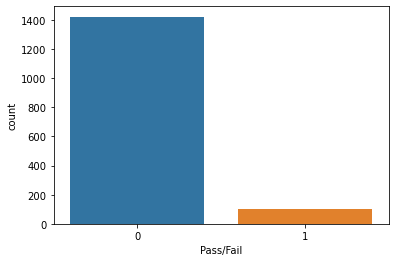

In [215]:
sns.countplot(x='Pass/Fail', data=df)

## Machine Learning (5 points)

It is always good to try a quick machine learning model. If your data is simple it might just work.

* Implement a `LogisticRegression` from scikit-learn
* Fit the model

In [ ]:
lr = LogisticRegression(max_iter=1500)
lr.fit(X_train, y_train)

It is always a good idea to see if the model fit the data well.
* uses the `.predict()` method to predict on the training data
* use the sklearn function `classification_report` to evaluate the model
* use the sklearn function `confusion_matrix`, you can plot this in plotly using `px.imshow()`

You will reuse these lines of code to visualize your results

In [ ]:
y_pred= lr.predict(X_train)
print(y_pred)

In [194]:
print("classification reports:\n",classification_report(y_train, y_pred))

classification reports:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       995
           1       0.80      0.28      0.41        72

    accuracy                           0.95      1067
   macro avg       0.88      0.64      0.69      1067
weighted avg       0.94      0.95      0.93      1067



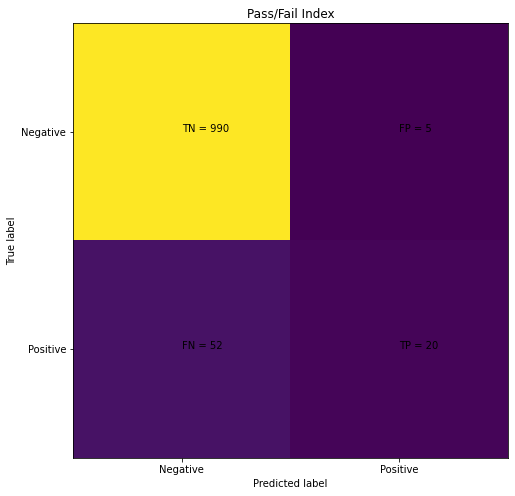

In [192]:
predictions = lr.predict(X_train)
cm = confusion_matrix(y_train,predictions)
    
fig, ax = plt.subplots(figsize=(12,8))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Pass/Fail Index')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Now use the same approach to visualize the test results

In [195]:
y_pred_test= lr.predict(X_test)

classification reports:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       427
           1       0.21      0.10      0.13        31

    accuracy                           0.91       458
   macro avg       0.58      0.54      0.54       458
weighted avg       0.89      0.91      0.90       458



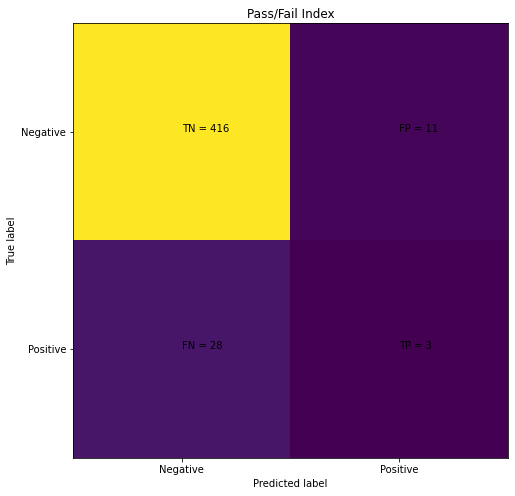

In [198]:
print("classification reports:\n",classification_report(y_test, y_pred_test))
predictions = lr.predict(X_test)
cm = confusion_matrix(y_test,predictions)
    
fig, ax = plt.subplots(figsize=(12,8))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Pass/Fail Index')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

<span style="color:blue">Question: Describe what might be wrong with this model, does it provide any practical value? (5 points)</span>

### Try Another Model (5 points)

It could be that we just selected a bad model for the problem, try with a random forest classifier as implemented in scikit-learn
* Instantiate the model
* Fit the data

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

Validate the model on the training and testing dataset

classification reports:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       995
           1       1.00      1.00      1.00        72

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



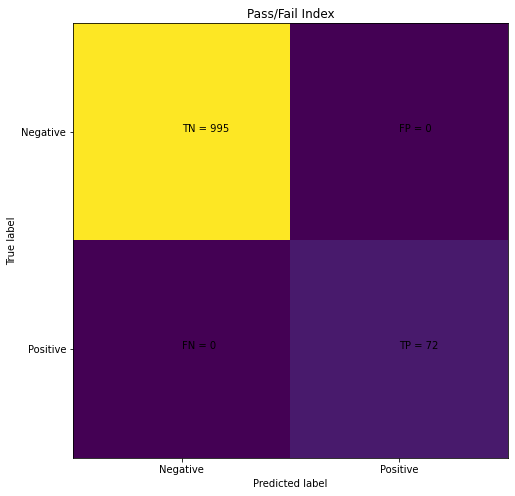

In [190]:
y_pred_rf= rf.predict(X_train)
print("classification reports:\n",classification_report(y_train, y_pred_rf))

cm = confusion_matrix(y_train,y_pred_rf)
    
fig, ax = plt.subplots(figsize=(12,8))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Pass/Fail Index')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

classification reports:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       427
           1       0.00      0.00      0.00        31

    accuracy                           0.93       458
   macro avg       0.47      0.50      0.48       458
weighted avg       0.87      0.93      0.90       458



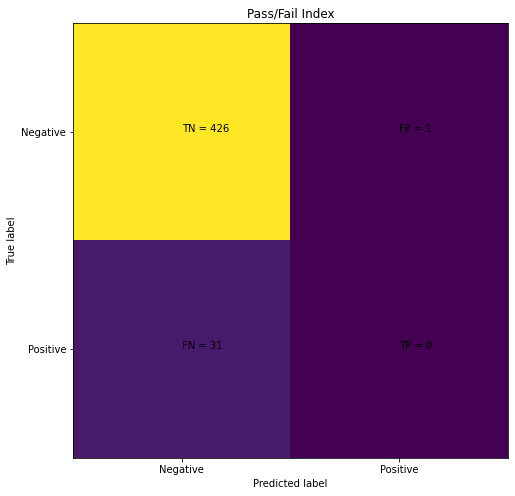

In [191]:
y_pred_rf_test= rf.predict(X_test)
print("classification reports:\n",classification_report(y_test, y_pred_rf_test))

cm = confusion_matrix(y_test,y_pred_rf_test)
    
fig, ax = plt.subplots(figsize=(12,8))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Pass/Fail Index')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

That still does not do anything meaningful

## Normalizing the Data (10 points)

Machine learning models prefer features with a mean of 0 and a standard deviation of 1. This makes the optimization easier.

1. Make a histogram of the mean and standard deviation you can use the built-in method `.mean()` and `.std()`
2. You can plot this using `px.histogram`

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

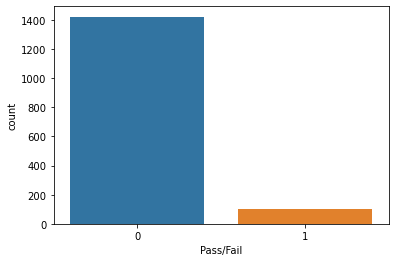

In [214]:
sns.countplot(x='Pass/Fail', data=df)

In [206]:
print("Mean Function\n",df.mean())
print("\nStd Function\n",df.std())

Mean Function
 0            3002.950184
1            2484.124302
2            2181.665760
3            1379.115593
4               4.238685
                ...     
586             0.021532
587             0.016460
588             0.005279
589            98.681713
Pass/Fail       0.067541
Length: 539, dtype: float64

Std Function
 0            202.497772
1            187.013758
2            204.500816
3            450.289250
4             56.870204
                ...    
586            0.012422
587            0.008864
588            0.002887
589           93.028132
Pass/Fail      0.251039
Length: 539, dtype: float64


In [213]:
df.hist(figsize=(720,450),grid=False, layout=(150,4))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSu

Scikit-learn has a utility function for conducting standard scalars `StandardScaler()`

We could implement the standard scaler in steps but it is more convenient to do it with a pipeline

### Scaled Logistic Regression (5 points)

1. Use the `Pipeline` utility to create a machine learning model that:
    - Computes the standard scalar of the data
    - Conducts logistic regression
2. Fit the model

In [ ]:
X_normalized=df.drop('Pass/Fail', axis=1)
y_normalized=df['Pass/Fail']
X_normalized = StandardScaler()

X_normalized_train, X_normalized_test, y_normalized_train, y_normalized_test=train_test_split(X_normalized, y_normalized, stratify=y_normalized, test_size=0.3, random_state=42)
clf = LinearSVC()
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

Visualize the results as you have done before

In [ ]:
# Your code goes here

In [ ]:
# Your code goes here

### Standard Scaled Random Forest (5 points)

1. Use the `Pipeline` utility to create a machine learning model that:
    - Computes the standard scalar of the data
    - Conducts Random Forest
2. Fit the model

In [ ]:
# Your code goes here

In [ ]:
# Your code goes here

<span style="color:blue"> Question: Explain what is going on with the random forest model? Why are the results so bad? (5 points)</span>

## Feature Reduction

### Logistic Regression (5 Points)

We can use PCA to reduce the number of features such that highly covariant features are combined. This helps deal with the curse of dimensionality.

Add PCA to the pipeline for the logistic regression, and visualize the results as we have done before

In [ ]:
# Your code goes here to build and fit the model

In [ ]:
# Your code goes here to validate the training performance

In [ ]:
# Your code goes here to validate the test performance

### Random Forest (5 points)

Add PCA to the pipeline for the logistic regression, and visualize the results as we have done before

In [ ]:
# Your code goes here to build and fit the feature reduced random forest classifier

In [ ]:
# Your code goes here to visualize the training results

In [ ]:
# Your code goes here to visualize the test results

<span style="color:blue"> Question: Explain if adding PCA helped, explain why you think PCA helped or did not help. (5 points)</span> 

## Hyperparameter Tuning 

To improve a machine learning model you might want to tune the hyperparameters.

Scikit-learn has automated tools for cross-validation and hyperparameter search. You can just define a dictionary of values that you want to search and it will try all of the fits returning the best results

### Logistic Regression (7.5 points)

Conduct build a pipeline and build a parameter grid to search the following hyperparameters:
1. C = [ 0.001, .01, .1, 1, 10, 100]
2. penalty = ['l1', 'l2']
3. class_weight = ['balanced']
4. solver = ['saga']
5. PCA n_components = [2, 3, 4, 5, 8, 10]

To conduct the fitting you should build the classifier with GridSearchCV. This conducts a grid search with cross-folds. See the documentation for more information. 

For the GridSearchCV set the scoring to 'f1', cv=5. If you want to monitor the status you can set verbose=10. 

In [ ]:
# Your code goes here

You should look and see what the best estimator was from the search. 

You can use the `best_estimator_` method

In [ ]:
# your code to evaluate the training process

In [ ]:
# Your code goes here for validating the model

### Random Forest Classifier (7.5 points)

Conduct build a pipeline and build a parameter grid to search the following hyperparameters:
1. Random Forest Criterion = [ "gini", "entropy", "log_loss"]
2. max depth = [4, 8, 12]
3. max features = ['sqrt', 'log2']
4. PCA n_components = [4, 8, 10, 20]

To conduct the fitting you should build the classifier with GridSearchCV. This conducts a grid search with cross-folds. See the documentation for more information. 

For the GridSearchCV set the scoring to 'f1', cv=5. If you want to monitor the status you can set verbose=10. 

In [ ]:
# Your code goes here

In [ ]:
# Your code to show the best estimator goes here

In [ ]:
# Your code to evaluate the training process

In [ ]:
# Your code to evaluate the performance of the model

## Balancing in the Data (10 points)

This is a classification problem, it is useful to see if the classes are balanced as this affects model training. 

If you have a highly unbalanced dataset you can train a model to predict the most common classes but getting the uncommon classes wrong has little effect on the model performance metrics.

View the ratio of the class outcomes. 

The class outcomes are stored in the ['pass/fail'] column, you can view the values and counts using the `.value_count()` built-in method

In [ ]:
# Your code goes here

Use `SMOTE(`)` to balance the dataset

In [ ]:
# Your code goes here

In [ ]:
# Check that this worked as expected

Using the balanced dataset repeat the analysis done with the hyperparameter search

### Logistic Regression (5 points)

In [ ]:
# Your fitting code here

In [ ]:
# Your code to show the best estimator

In [ ]:
# Your code to check the training process

In [ ]:
# Your code to validate the training process

### Random Forest Classifier (5 Points)

In [ ]:
# Your code to conduct the classifier

In [ ]:
# Your code to show the best estimator

In [ ]:
# Your code to validate the training process

In [ ]:
# Your code to validate the model performance

<span style="color:blue">Question: Given that you are trying to predict and determine the underlying features responsible for producing products that "pass" which model would be better and why? (5 points)</span>

## Bonus (10 Points): 

Use any method available to you to get a better validation F1 score for the Pass Classification

A trick to always get better results is to use ensemble methods